KNN Car Evaluation Prediction

In [130]:
# Data manipulation
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning tools
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Reading data set as csv file

In [131]:
address = 'C:\\Users\\Merjema\\Desktop\\cars.csv'

car = pd.read_csv(address)

car.columns = ['buying','maintenance', 'doors','persons','lug_boot','safety', 'acceptability']



In [132]:
car.head()


,buying,maintenance,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [133]:
car.describe()

,buying,maintenance,doors,persons,lug_boot,safety,acceptability
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,low,low,4,4,med,high,unacc
freq,432,432,432,576,576,576,1209


In [134]:
car['acceptability'].value_counts().sort_index()

acc       384
good       69
unacc    1209
vgood      65
Name: acceptability, dtype: int64

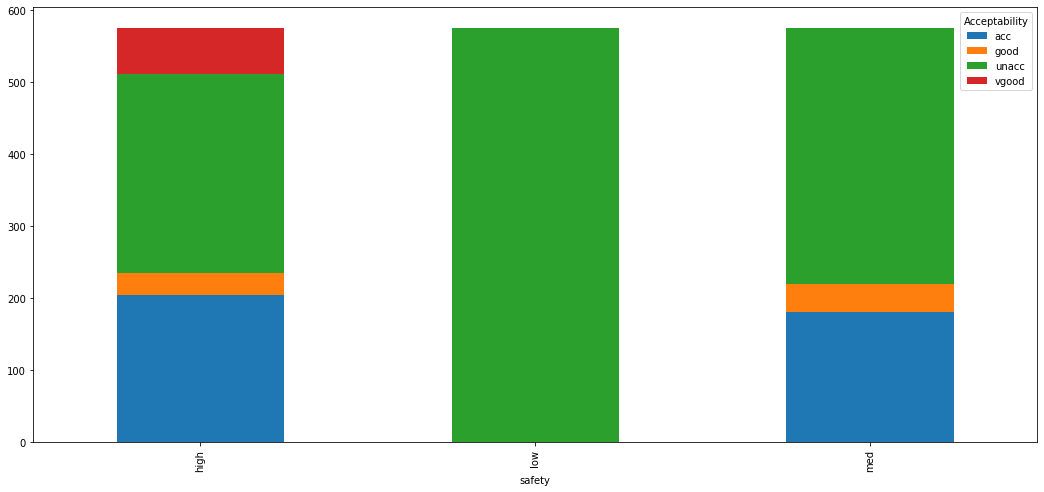

In [135]:
buy = pd.crosstab(car['safety'], car['acceptability'])
plt.rcParams["figure.figsize"] = [18, 8]
buy.plot.bar(stacked=True)
plt.legend(title='Acceptability')
plt.show()

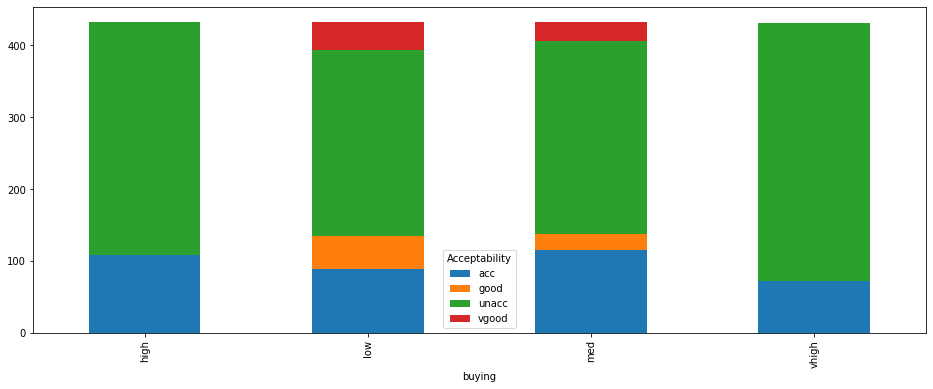

In [136]:
buy = pd.crosstab(car['buying'], car['acceptability'])
plt.rcParams["figure.figsize"] = [16, 6]
buy.plot.bar(stacked=True)
plt.legend(title='Acceptability')
plt.show()

Visualizing output class

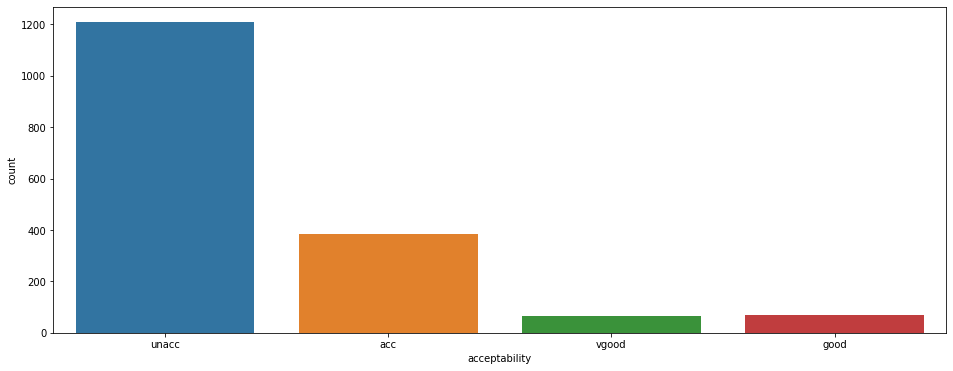

In [137]:
sns.countplot(car['acceptability'])

In [138]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(car)

     buying maintenance  doors persons lug_boot safety acceptability
0     vhigh       vhigh      2       2    small    med         unacc
1     vhigh       vhigh      2       2    small   high         unacc
2     vhigh       vhigh      2       2      med    low         unacc
3     vhigh       vhigh      2       2      med    med         unacc
4     vhigh       vhigh      2       2      med   high         unacc
5     vhigh       vhigh      2       2      big    low         unacc
6     vhigh       vhigh      2       2      big    med         unacc
7     vhigh       vhigh      2       2      big   high         unacc
8     vhigh       vhigh      2       4    small    low         unacc
9     vhigh       vhigh      2       4    small    med         unacc
10    vhigh       vhigh      2       4    small   high         unacc
11    vhigh       vhigh      2       4      med    low         unacc
12    vhigh       vhigh      2       4      med    med         unacc
13    vhigh       vhigh      2    

In [139]:
le=LabelEncoder()

In [140]:
for i in car.columns:
   car[i]=le.fit_transform(car[i])

In [141]:
car.head()

,buying,maintenance,doors,persons,lug_boot,safety,acceptability
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [142]:
X = car.iloc[:,0:6]
y = car['acceptability']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0) 


Input variable

In [143]:
X.head()

,buying,maintenance,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


Output variable

In [144]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: acceptability, Length: 1727, dtype: int32

Feature scaling: Standardization


In [145]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [146]:
X_train

array([[-0.44185733, -0.42054964, -0.46054733, -1.2203218 ,  1.21637035,
        -1.24953204],
       [-0.44185733, -1.31819886,  0.43524966, -1.2203218 , -1.22343713,
        -1.24953204],
       [ 1.34236774, -0.42054964, -0.46054733,  0.00354487,  1.21637035,
        -1.24953204],
       ...,
       [-0.44185733, -0.42054964, -0.46054733, -1.2203218 , -1.22343713,
         1.19639815],
       [-1.33396986, -1.31819886, -1.35634433,  1.22741154,  1.21637035,
        -1.24953204],
       [-1.33396986,  0.47709959, -0.46054733,  0.00354487,  1.21637035,
         1.19639815]])

In [147]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

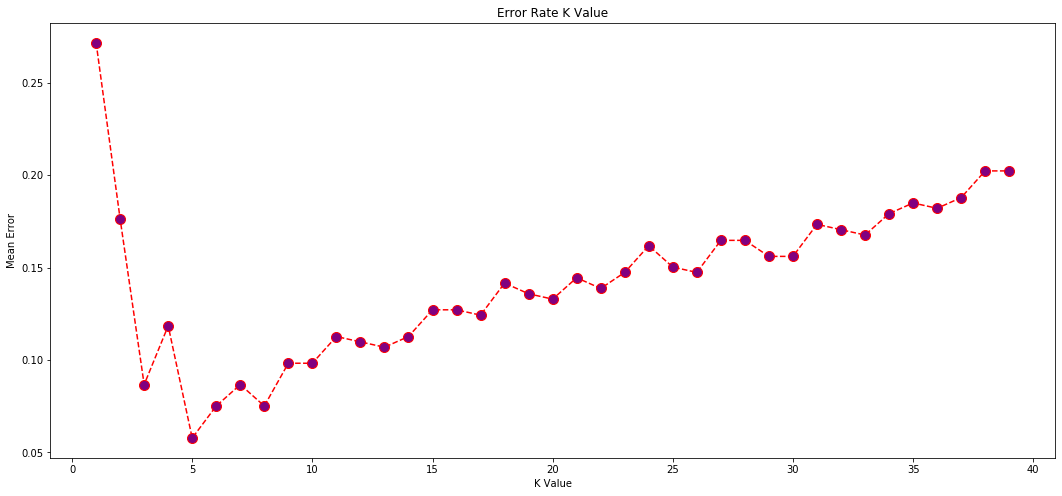

In [148]:
plt.figure(figsize=(18, 8))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='purple', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Instantiating KNN Learning Model with K=5

In [149]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

0.9421965317919075

Comparing results

In [151]:
print(accuracy_score(y_test,y_pred))


0.9421965317919075


In [152]:
y_pred

array([0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 3,
       2, 2, 2, 2, 0, 2, 2, 3, 0, 0, 2, 2, 2, 0, 2, 2, 3, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2,

In [153]:
y_test.ravel()

array([0, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2,
       2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 3, 2,

In [154]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[ 68,   1,   8,   0],
       [  5,   8,   1,   0],
       [  3,   0, 236,   0],
       [  1,   0,   1,  14]], dtype=int64)

In [155]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 



In [156]:
accuracy(cm)

0.9421965317919075

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        77
           1       0.89      0.57      0.70        14
           2       0.96      0.99      0.97       239
           3       1.00      0.88      0.93        16

    accuracy                           0.94       346
   macro avg       0.93      0.83      0.87       346
weighted avg       0.94      0.94      0.94       346

